In [1]:
import pandas as pd
goalscorers=pd.read_csv('Goal_Scorers.csv')
goalscorers.head(10)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
5,1916-07-06,Argentina,Chile,Chile,Telésforo Báez,44.0,False,False
6,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,60.0,False,True
7,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,62.0,False,True
8,1916-07-06,Argentina,Chile,Argentina,Alberto Marcovecchio,67.0,False,False
9,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,75.0,False,False


In [4]:
#Dataset Information
goalscorers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44362 entries, 0 to 44361
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44362 non-null  object 
 1   home_team  44362 non-null  object 
 2   away_team  44362 non-null  object 
 3   team       44362 non-null  object 
 4   scorer     44313 non-null  object 
 5   minute     44103 non-null  float64
 6   own_goal   44362 non-null  bool   
 7   penalty    44362 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


In [ ]:
#CHECKING FOR MISSING VALUES
goalscorers.isnull().sum()

date           0
home_team      0
away_team      0
team           0
scorer        49
minute       259
own_goal       0
penalty        0
dtype: int64

In [ ]:
#checking for duplicates.
goalscorers[goalscorers.duplicated()]

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
4060,1963-11-26,Ghana,Ethiopia,Ghana,Edward Acquah,51.0,False,False
4064,1963-11-28,Ethiopia,Tunisia,Ethiopia,Mengistu Worku,51.0,False,False
4068,1963-11-28,Nigeria,Sudan,Sudan,Nasr Eddin Abbas,51.0,False,False
4230,1965-03-14,Suriname,Trinidad and Tobago,Suriname,Edmund Waterval,51.0,False,False
5106,1968-01-16,Congo,Ghana,Ghana,Osei Kofi,51.0,False,False
...,...,...,...,...,...,...,...,...
34443,2015-06-13,Poland,Georgia,Poland,Robert Lewandowski,90.0,False,False
38961,2019-09-08,Spain,Faroe Islands,Spain,Paco Alcácer,90.0,False,False
41297,2021-09-05,San Marino,Poland,Poland,Adam Buksa,90.0,False,False
41771,2021-10-12,Syria,Lebanon,Lebanon,Mohamad Kdouh,45.0,False,False


In [36]:
#dropping the duplicates.
goalscorers=goalscorers.drop_duplicates()

In [37]:
#Replacing the missing values with their mode and median.
goalscorers['scorer']=goalscorers['scorer'].fillna(goalscorers['scorer'].mode()[0])
goalscorers['minute']=goalscorers['minute'].fillna(goalscorers['minute'].median())

In [38]:
#converting the date to datetime and minute to numeric
goalscorers['minute']=pd.to_numeric(goalscorers['minute'],errors='coerce')
goalscorers['date']=pd.to_datetime(goalscorers['date'])


In [39]:
#Summary of numerical columns
goalscorers.describe()

,date,minute
count,44280,44280.000000
mean,1997-06-07 12:27:38.536585344,50.011676
min,1916-07-02 00:00:00,1.000000
25%,1986-03-20 00:00:00,28.000000
50%,2002-06-04 00:00:00,51.000000
75%,2013-09-10 00:00:00,73.000000
max,2024-07-14 00:00:00,122.000000
std,NaN,26.301195


In [40]:
#Counting number of scorers
goalscorers['scorer'].value_counts().head()

scorer
Cristiano Ronaldo     120
Robert Lewandowski     62
Romelu Lukaku          60
Harry Kane             58
Lionel Messi           55
Name: count, dtype: int64

In [41]:
#counting the number of goals scored by each team
goalscorers['team'].value_counts().head()

team
Brazil       1051
Germany       974
Argentina     948
Spain         893
Mexico        852
Name: count, dtype: int64

In [34]:
#Number of goals per home team
goalscorers['home_team'].value_counts().head()

home_team
Brazil       1023
Argentina     992
Germany       798
Mexico        707
France        667
Name: count, dtype: int64

In [35]:
#Number of goals scored by each away team
goalscorers['away_team'].value_counts().head()

away_team
Uruguay     787
Paraguay    662
Spain       569
Peru        563
Germany     562
Name: count, dtype: int64

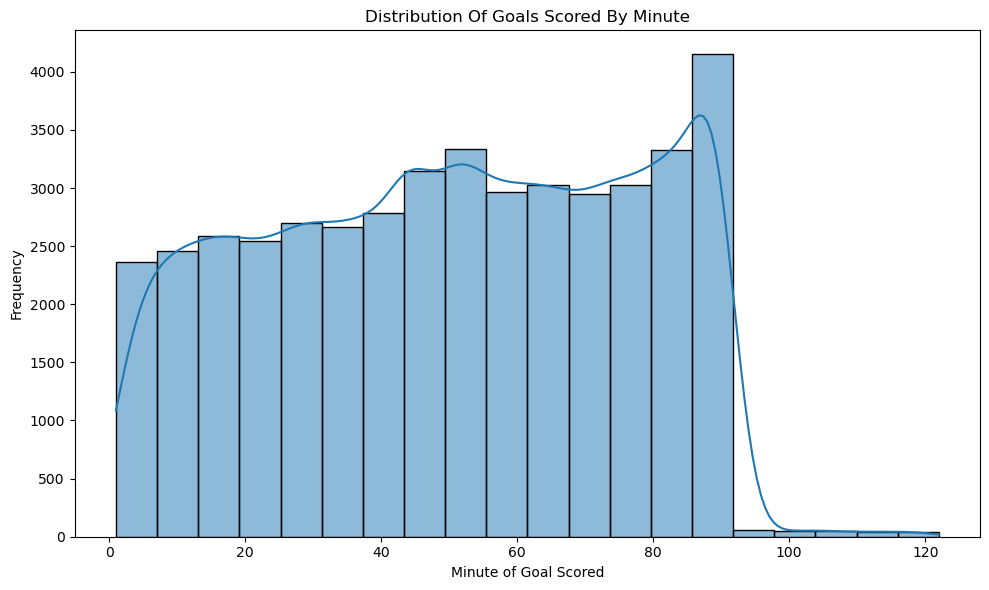

In [44]:
#Histogram of goals scored at different minutes
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(goalscorers['minute'],bins=20,kde=True)
plt.title('Distribution Of Goals Scored By Minute')
plt.xlabel('Minute of Goal Scored')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

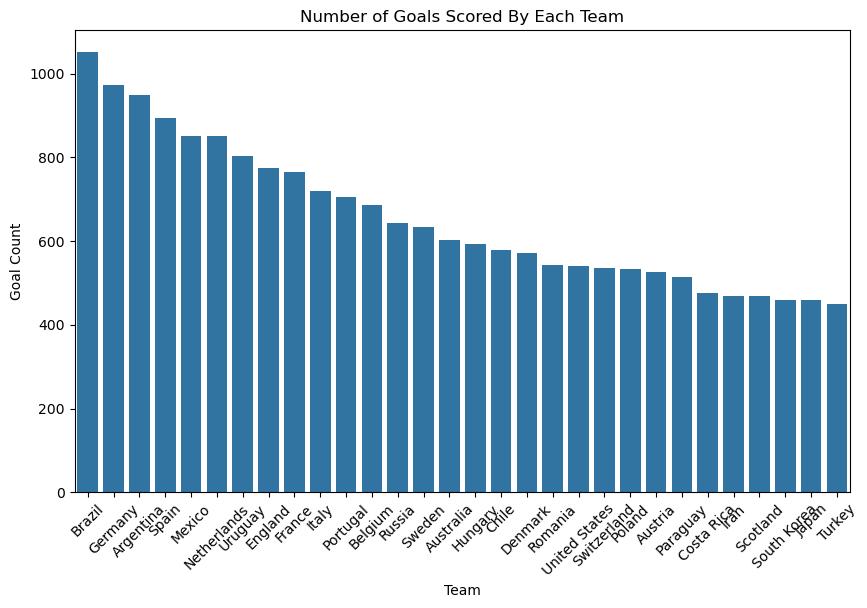

In [48]:
#Count plot of number of goals by team
plt.figure(figsize=(10,6))
sns.countplot(x='team', data=goalscorers,order=goalscorers['team'].value_counts().head(30).index)
plt.title('Number of Goals Scored By Each Team')
plt.xlabel('Team')
plt.ylabel('Goal Count')
plt.xticks(rotation=45)
plt.show()

In [57]:
#Penalty goals
goalscorers[goalscorers['penalty']==True].shape[0]

2962

In [58]:
#And total number of own goals
goalscorers[goalscorers['own_goal']==True].shape[0]

821